## quad_utils_mod exploration

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from quad_utils import quad_utils_mod

def interpolate_and_plot(x_corners, y_corners, values, do_rotate, interpolated_point, plot_type="contour"):
    """
    Perform bilinear interpolation over a grid and plot the results.

    Parameters:
        x_corners (list): x-coordinates of the quadrilateral corners.
        y_corners (list): y-coordinates of the quadrilateral corners.
        values (list): Values at the quadrilateral corners.
        do_rotate (bool): Whether to rotate the quadrilateral before interpolation.
        interpolated_point (tuple): The (x, y) coordinates of the point to interpolate.
        plot_type (str): Type of plot to generate ("contour" or "surface").

    Returns:
        z_mesh (ndarray): Interpolated values over the grid.
        det (float): Determinant of the transformation matrix.
        interpolated_value (float): Interpolated value at the specified point.
    """
    # Generate a grid of points within the quadrilateral
    num_points = 100
    x_grid = np.linspace(min(x_corners), max(x_corners), num_points)
    y_grid = np.linspace(min(y_corners), max(y_corners), num_points)

    x_mesh, y_mesh = np.meshgrid(x_grid, y_grid)
    z_mesh = np.zeros_like(x_mesh)

    # Placeholder for the determinant (output variable from Fortran subroutine)
    d = np.zeros(1, dtype=np.float64)

    # Perform interpolation for each point in the grid
    for i in range(num_points):
        for j in range(num_points):
            z_mesh[i, j], d = quad_utils_mod.quad_bilinear_interp(
                x_mesh[i, j], y_mesh[i, j], x_corners, y_corners, values, do_rotate
            )

    # Interpolate the specified point
    interpolated_value, d = quad_utils_mod.quad_bilinear_interp(
        interpolated_point[0], interpolated_point[1], x_corners, y_corners, values, do_rotate
    )

    # Plot the results
    if plot_type == "contour":
        plt.figure(figsize=(10, 8))
        contour = plt.contourf(x_mesh, y_mesh, z_mesh, levels=20, cmap='viridis')
        plt.colorbar(contour, label='Interpolated Value')

        # Plot the quadrilateral corners and edges
        plt.scatter(x_corners, y_corners, color='black', label='Corners')
        plt.plot(x_corners + [x_corners[0]], y_corners + [y_corners[0]], 'k-')

        # Plot the single interpolated point
        plt.scatter(
            interpolated_point[0],
            interpolated_point[1],
            color='blue',
            label=f'Interpolated Point\nValue: {interpolated_value:.6f}',
            edgecolors='black',
        )

        # Add labels and title
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.title('Bilinear Interpolation within Quadrilateral (Contour Plot)')
        plt.legend()

    elif plot_type == "surface":
        fig = plt.figure(figsize=(12, 8))
        ax = fig.add_subplot(111, projection='3d')

        # Plot the surface
        surface = ax.plot_surface(x_mesh, y_mesh, z_mesh, cmap='viridis', edgecolor='none', alpha=0.8)
        fig.colorbar(surface, ax=ax, label='Interpolated Value')

         # Plot the quadrilateral corners and edges
        ax.scatter(x_corners, y_corners, values, color='black')
        ax.plot(x_corners + [x_corners[0]], y_corners + [y_corners[0]], values + [values[0]], 'k-')

        # Plot the single interpolated point
        ax.scatter(
            interpolated_point[0],
            interpolated_point[1],
            interpolated_value,
            color='blue',
            label=f'Interpolated Point\nValue: {interpolated_value:.6f}',
            s=100,
            edgecolors='black',
        )

        # Add labels and title
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')
        ax.set_zlabel('Interpolated Value')
        ax.set_title('Bilinear Interpolation Surface Plot')
        ax.legend()

    else:
        raise ValueError("Invalid plot_type. Choose 'contour' or 'surface'.")

    # Show the plot
    plt.show()

    return z_mesh, d, interpolated_value

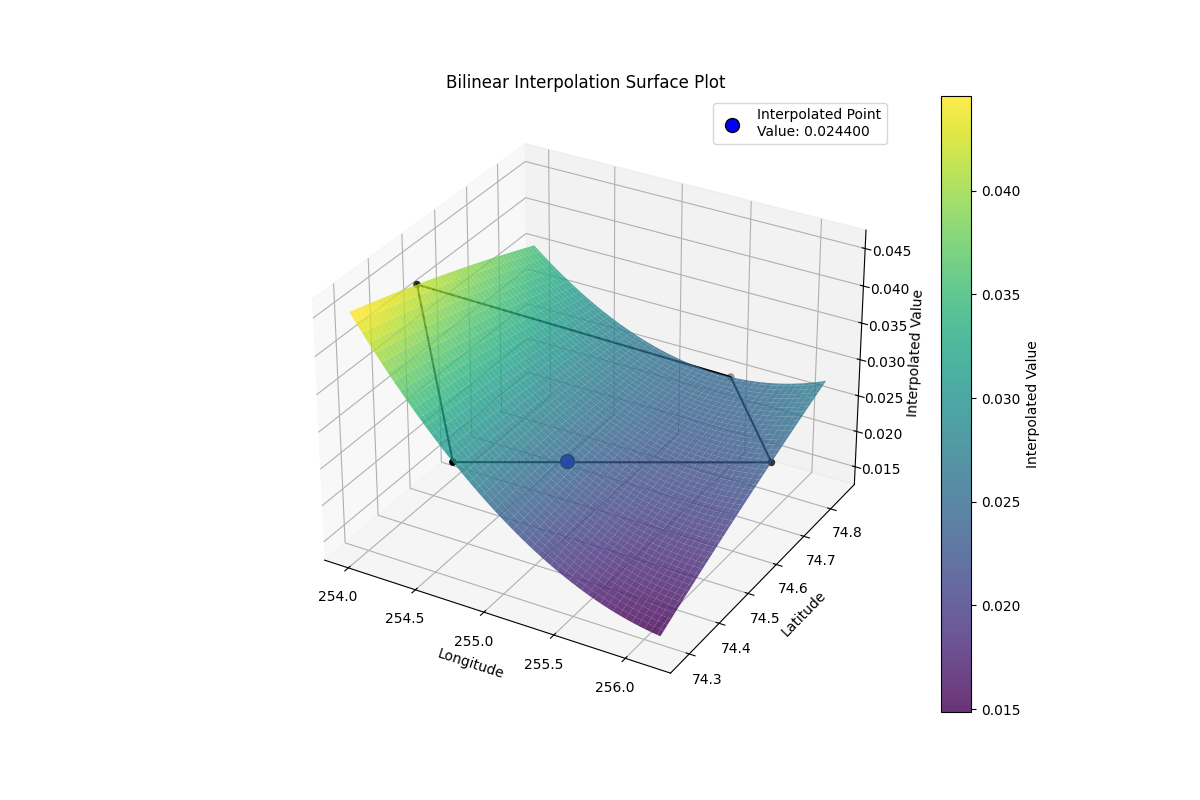

Determinant: 0.298419442945
Interpolated Value: 0.024400


In [2]:
%matplotlib widget
x_corners = [253.978338312172, 254.698325218660, 256.152459376863, 255.464594303337]
y_corners = [74.4775053981321, 74.2803767364551, 74.6534788353970, 74.8496146897753]
values = [0.04222093679422526, 0.02939444349332336, 0.02361927128232367, 0.02457275269829678]

do_rotate = True
interpolated_point = (255.070312500000, 74.4735717773438)

z_mesh, det, interpolated_value = interpolate_and_plot(
    x_corners, y_corners, values, do_rotate, interpolated_point, plot_type="surface")

print(f'Determinant: {det:.12f}')
print(f'Interpolated Value: {interpolated_value:.6f}')

orignal x_corners: [253.97833831 254.69832522 256.15245938 255.4645943 ]
orignal y_corners: [74.4775054  74.28037674 74.65347884 74.84961469]
rotated x_corners: [0.         0.74648567 2.05047378 1.33523186]
rotated y_corners: [0.00000000e+00 1.38819848e-16 7.43859084e-01 7.51384112e-01]


/var/folders/qv/qpqwspdx2mn4zndqj91cxnkwzfytzl/T/ipykernel_22919/4146965275.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  quad_utils_mod.rotate_quad(x_corners, y_corners, lon, lat)


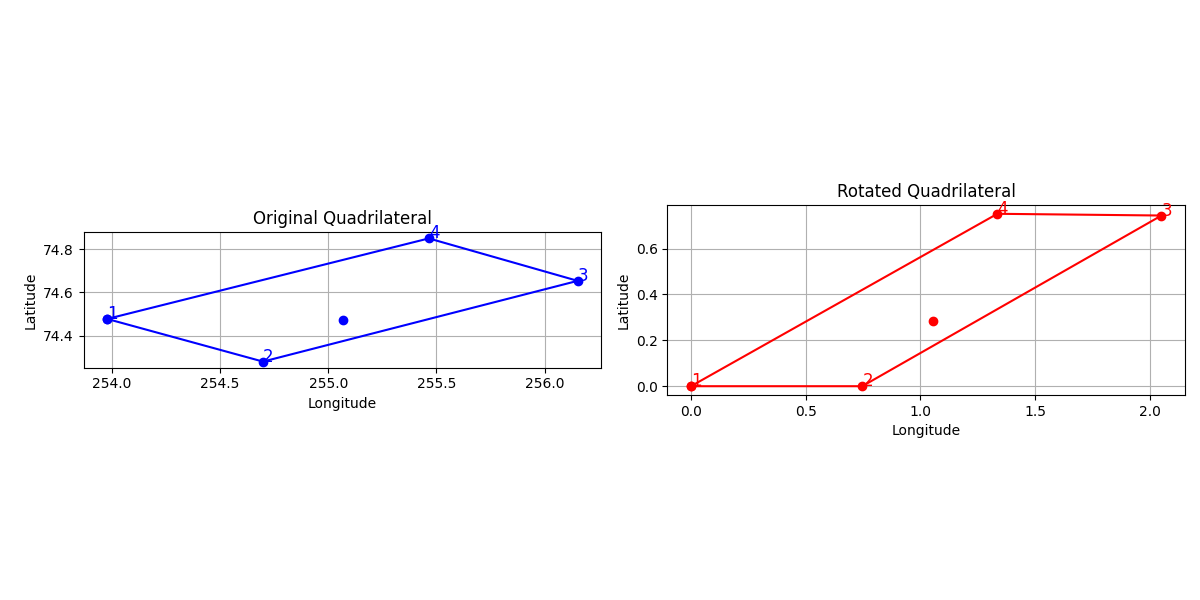

Rotated Interpolation Point:
Longitude: 1.0542500399073693
Latitude: 0.2845697693192429


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from quad_utils import quad_utils_mod

# Define the original quadrilateral corners and interpolation point
x_corners = np.array([253.978338312172, 254.698325218660, 256.152459376863, 255.464594303337], dtype=np.float64)
y_corners = np.array([74.4775053981321, 74.2803767364551, 74.6534788353970, 74.8496146897753], dtype=np.float64)
lon = np.array([255.070312500000], dtype=np.float64)  # Mutable scalar for longitude
lat = np.array([74.4735717773438], dtype=np.float64)  # Mutable scalar for latitude

# Save the original corners for plotting
original_x_corners = x_corners.copy()
original_y_corners = y_corners.copy()
original_lon = lon.copy()
original_lat = lat.copy()

print(f"orignal x_corners: {x_corners}")
print(f"orignal y_corners: {y_corners}")


# Call the Fortran subroutine to rotate the quadrilateral
quad_utils_mod.rotate_quad(x_corners, y_corners, lon, lat)

print(f"rotated x_corners: {x_corners}")
print(f"rotated y_corners: {y_corners}")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the original quadrilateral
axes[0].plot(
    np.append(original_x_corners, original_x_corners[0]),
    np.append(original_y_corners, original_y_corners[0]),
    'b-o',
    label='Original Corners'
)

axes[0].scatter(original_lon, original_lat, color='blue', label='Interpolation Point')
for i in range(4):
    axes[0].text(original_x_corners[i], original_y_corners[i], str(i + 1), color='blue', fontsize=12)
axes[0].set_title('Original Quadrilateral')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')
axes[0].grid(True)
axes[0].set_aspect('equal') 

# Plot the rotated quadrilateral
axes[1].plot(
    np.append(x_corners, x_corners[0]),
    np.append(y_corners, y_corners[0]),
    'r-o',
    label='Rotated Corners'
)

axes[1].scatter(lon[0], lat[0], color='red', label='Interpolation Point')
for i in range(4):
    axes[1].text(x_corners[i], y_corners[i], str(i + 1), color='red', fontsize=12)
axes[1].set_title('Rotated Quadrilateral')
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')
axes[1].grid(True)
axes[1].set_aspect('equal') 


plt.tight_layout()
plt.show()

# Print the rotated interpolation point
print("Rotated Interpolation Point:")
print(f"Longitude: {lon[0]}")
print(f"Latitude: {lat[0]}")

In [4]:
import numpy as np
from quad_utils import quad_utils_mod 

# Calculate the vector from corner1 to corner2
vector = np.array([original_x_corners[1] - original_x_corners[0], original_y_corners[1] - original_y_corners[0]])

# Calculate the angle between the vector and the x-axis
angle = quad_utils_mod.angle2(vector, np.array([1.0, 0.0], dtype=np.float64))
print(f"Angle between corner1->corner2 and x-axis (radians): {angle}")
print(f"Angle between corner1->corner2 and x-axis (degrees): {np.degrees(angle)}")


Angle between corner1->corner2 and x-axis (radians): 0.26724538904721795
Angle between corner1->corner2 and x-axis (degrees): 15.312032886737306


Original x_corners: [253.97833831 254.69832522 256.15245938 255.4645943 ]
Original y_corners: [74.4775054  74.28037674 74.65347884 74.84961469]
Rotated x_corners: [253.97833831 254.72482398 256.02881209 255.31357017]
Rotated y_corners: [74.4775054  74.4775054  75.22136448 75.22888951]


/var/folders/qv/qpqwspdx2mn4zndqj91cxnkwzfytzl/T/ipykernel_22919/3887000658.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  quad_utils_mod.rotate_quad_no_translate(x_corners, y_corners, lon, lat)


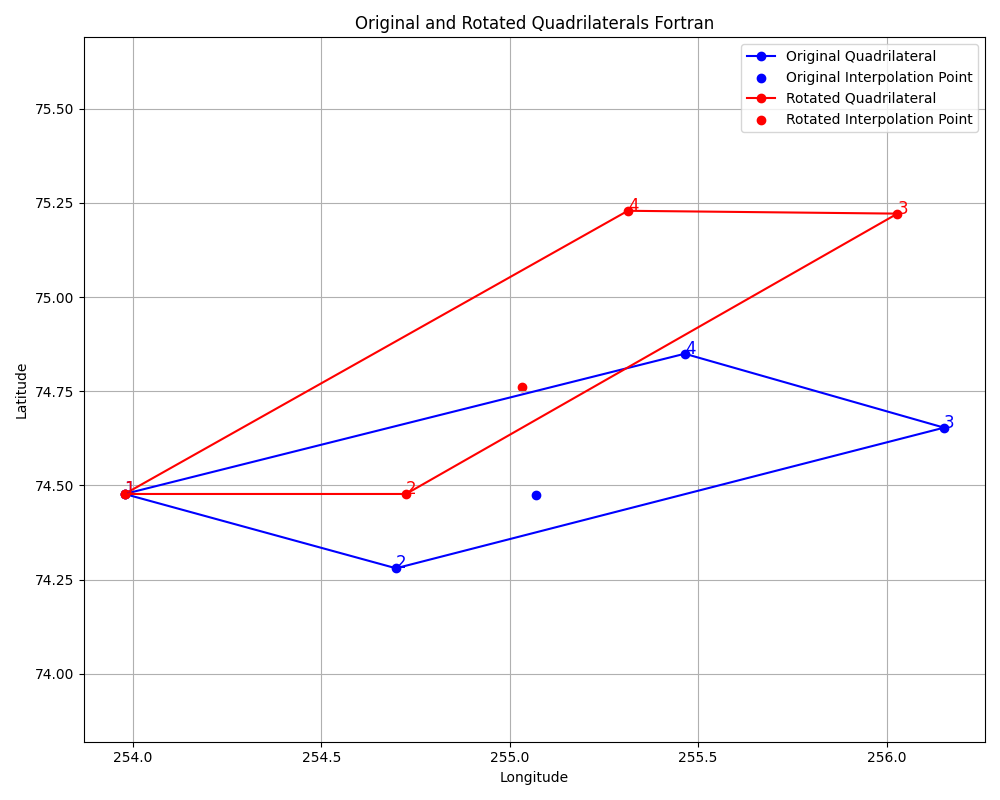

Rotated Interpolation Point:
Longitude: 255.0325883520794
Latitude: 74.76207516745134


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from quad_utils import quad_utils_mod

# Define the original quadrilateral corners and interpolation point
x_corners = np.array([253.978338312172, 254.698325218660, 256.152459376863, 255.464594303337], dtype=np.float64)
y_corners = np.array([74.4775053981321, 74.2803767364551, 74.6534788353970, 74.8496146897753], dtype=np.float64)
lon = np.array([255.070312500000], dtype=np.float64)  # Mutable scalar for longitude
lat = np.array([74.4735717773438], dtype=np.float64)  # Mutable scalar for latitude

# Save the original corners for plotting
original_x_corners = x_corners.copy()
original_y_corners = y_corners.copy()
original_lon = lon.copy()
original_lat = lat.copy()

print(f"Original x_corners: {x_corners}")
print(f"Original y_corners: {y_corners}")

# Call the Fortran subroutine to rotate the quadrilateral
quad_utils_mod.rotate_quad_no_translate(x_corners, y_corners, lon, lat)

print(f"Rotated x_corners: {x_corners}")
print(f"Rotated y_corners: {y_corners}")

# Create a single plot
plt.figure(figsize=(10, 8))

# Plot the original quadrilateral
plt.plot(
    np.append(original_x_corners, original_x_corners[0]),
    np.append(original_y_corners, original_y_corners[0]),
    'b-o',
    label='Original Quadrilateral'
)
plt.scatter(original_lon, original_lat, color='blue', label='Original Interpolation Point')
for i in range(4):
    plt.text(original_x_corners[i], original_y_corners[i], str(i + 1), color='blue', fontsize=12)

# Plot the rotated quadrilateral
plt.plot(
    np.append(x_corners, x_corners[0]),
    np.append(y_corners, y_corners[0]),
    'r-o',
    label='Rotated Quadrilateral'
)
plt.scatter(lon[0], lat[0], color='red', label='Rotated Interpolation Point')
for i in range(4):
    plt.text(x_corners[i], y_corners[i], str(i + 1), color='red', fontsize=12)

# Add labels, legend, and grid
plt.title('Original and Rotated Quadrilaterals Fortran')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.legend()
plt.axis('equal')  # Ensure equal scaling for both axes

# Show the plot
plt.tight_layout()
plt.show()

# Print the rotated interpolation point
print("Rotated Interpolation Point:")
print(f"Longitude: {lon[0]}")
print(f"Latitude: {lat[0]}")

## Numpy version of rotation (no call to Fortran quad_utils_mod)

In [6]:
import numpy as np

def rotate_points(points, point1, point2):
    """
    Rotate a set of 4 points counterclockwise by the angle between the line
    from point1 to point2 and the x-axis.

    Parameters:
        points (ndarray): A 2D array of shape (4, 2), where each row is a point [x, y].
        point1 (ndarray): A 1D array [x, y] representing the first point.
        point2 (ndarray): A 1D array [x, y] representing the second point.

    Returns:
        ndarray: A 2D array of shape (4, 2) containing the rotated points.
    """
    # Calculate the vector from point1 to point2
    vector = point2 - point1

    # Calculate the angle between the vector and the x-axis
    angle = abs(np.arctan2(vector[1], vector[0]))  # Angle in radians  absolute value
    print(f"angle: {angle}")
    print(f"angle in degrees: {np.degrees(angle)}")
    # Create the rotation matrix for counterclockwise rotation
    rotation_matrix = np.array([
        [np.cos(angle), -np.sin(angle)],
        [np.sin(angle),  np.cos(angle)]
    ])

    # Translate points so point1 becomes the origin
    translated_points = points - point1

    # Rotate the points
    rotated_points = np.dot(translated_points, rotation_matrix.T)

    # Translate the points back to their original position
    rotated_points += point1

    return rotated_points

angle: 0.26724538904721773
angle in degrees: 15.312032886737292
Original Points:
[[253.97833831  74.4775054 ]
 [254.69832522  74.28037674]
 [256.15245938  74.65347884]
 [255.4645943   74.84961469]]

Rotated Points:
[[253.97833831  74.4775054 ]
 [254.72482398  74.4775054 ]
 [256.02881209  75.22136448]
 [255.31357017  75.22888951]]


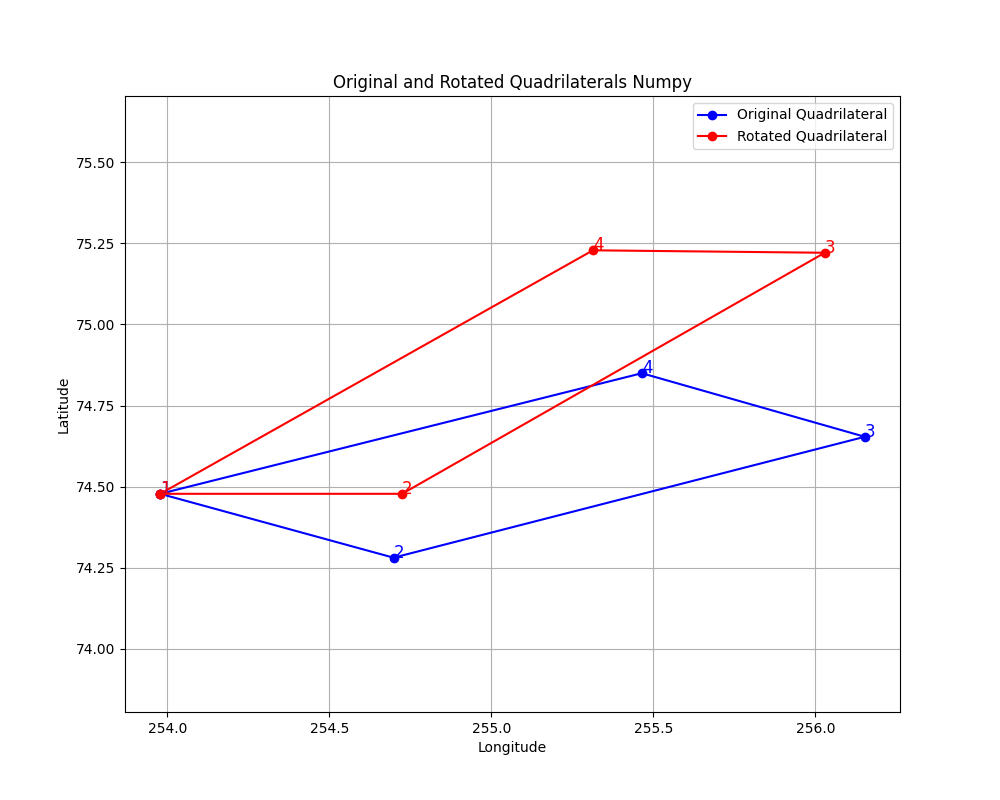

In [7]:
# Define the 4 points

x_corners = np.array([253.978338312172, 254.698325218660, 256.152459376863, 255.464594303337], dtype=np.float64)
y_corners = np.array([74.4775053981321, 74.2803767364551, 74.6534788353970, 74.8496146897753], dtype=np.float64)
points = np.column_stack((x_corners, y_corners))

# Define point1 and point2
point1 = np.array([x_corners[0], y_corners[0]])
point2 = np.array([x_corners[1], y_corners[1]])

# Rotate the points
rotated_points = rotate_points(points, point1, point2)

# Print the results
print("Original Points:")
print(points)
print("\nRotated Points:")
print(rotated_points)

# Plot the original and rotated quadrilaterals
plt.figure(figsize=(10, 8))

# Plot the original quadrilateral
plt.plot(
    np.append(points[:, 0], points[0, 0]),
    np.append(points[:, 1], points[0, 1]),
    'b-o',
    label='Original Quadrilateral'
)

# Plot the rotated quadrilateral
plt.plot(
    np.append(rotated_points[:, 0], rotated_points[0, 0]),
    np.append(rotated_points[:, 1], rotated_points[0, 1]),
    'r-o',
    label='Rotated Quadrilateral'
)

# Add labels for the corners
for i in range(4):
    plt.text(points[i, 0], points[i, 1], f'{i+1}', color='blue', fontsize=12)
    plt.text(rotated_points[i, 0], rotated_points[i, 1], f'{i+1}', color='red', fontsize=12)

# Add labels and legend
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Original and Rotated Quadrilaterals Numpy')
plt.legend()
plt.grid(True)
plt.axis('equal')  # Ensure equal scaling for both axes

# Show the plot
plt.show()